In [56]:
# Matplotlib Inline Charts
%matplotlib inline

In [57]:
# Import Dependencies
from citipy import citipy
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
from scipy.stats import linregress
import time

# Import the API key.
from config import weather_api_key


In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
len(coordinates)

1500

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | plerin
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | nhulunbuy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | pacsa
Processing Record 8 of Set 1 | wonthaggi
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | krasnyy kut
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lamar
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | duncan
Processing Record 16 of Set 1 | ligaya
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | upata
Processing Record 19 of Set 1 | hollins
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | qaanaaq
Processing Record 24 of S

Processing Record 39 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 4 | hanna
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | belaya gora
Processing Record 43 of Set 4 | grand-lahou
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | mafinga
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | mutoko
Processing Record 50 of Set 4 | chicama
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | chenghai
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | gazanjyk
Processing Record 5 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | cap malheureux
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | camacha
Processing Record 10 of Set 5 | charagua
Processin

Processing Record 26 of Set 8 | dire
Processing Record 27 of Set 8 | santa cruz
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | stony mountain
Processing Record 30 of Set 8 | maryborough
Processing Record 31 of Set 8 | buluang
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | naftah
City not found. Skipping...
Processing Record 34 of Set 8 | qandala
Processing Record 35 of Set 8 | puri
Processing Record 36 of Set 8 | andenes
Processing Record 37 of Set 8 | atbasar
Processing Record 38 of Set 8 | chengzihe
Processing Record 39 of Set 8 | mitsamiouli
Processing Record 40 of Set 8 | labutta
City not found. Skipping...
Processing Record 41 of Set 8 | garowe
Processing Record 42 of Set 8 | cranbrook
Processing Record 43 of Set 8 | oktyabrskoye
Processing Record 44 of Set 8 | san-pedro
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | dakar
Processing Record 48 of Set 8 | chodava

Processing Record 14 of Set 12 | roma
Processing Record 15 of Set 12 | oarai
Processing Record 16 of Set 12 | sola
Processing Record 17 of Set 12 | joanopolis
Processing Record 18 of Set 12 | opuwo
Processing Record 19 of Set 12 | istok
Processing Record 20 of Set 12 | batsfjord
Processing Record 21 of Set 12 | ajaccio
Processing Record 22 of Set 12 | shaoguan
Processing Record 23 of Set 12 | upington
Processing Record 24 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 25 of Set 12 | brazzaville
Processing Record 26 of Set 12 | graulhet
Processing Record 27 of Set 12 | mega
Processing Record 28 of Set 12 | smithers
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | idritsa
Processing Record 31 of Set 12 | manicore
Processing Record 32 of Set 12 | ouadda
Processing Record 33 of Set 12 | rio grande
Processing Record 34 of Set 12 | tiznit
Processing Record 35 of Set 12 | ballstad
City not found. Skipping...
Processing Record 36 of Set 12 | melfi


In [38]:
# Check Results
len(city_data)

562

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Plerin,48.5425,-2.7798,59.32,87,75,1.99,FR,2021-07-11 23:16:38
1,Kodiak,57.7900,-152.4072,51.31,82,90,17.27,US,2021-07-11 23:16:39
2,Nhulunbuy,-12.2333,136.7667,75.81,94,40,8.05,AU,2021-07-11 23:16:39
3,Rikitea,-23.1203,-134.9692,73.71,82,44,21.63,PF,2021-07-11 23:16:39
4,Vostok,46.4856,135.8833,71.10,78,99,1.54,RU,2021-07-11 23:16:40
5,Tasiilaq,65.6145,-37.6368,46.56,99,100,8.32,GL,2021-07-11 23:16:40
6,Pacsa,46.7198,17.0140,65.59,88,75,11.50,HU,2021-07-11 23:16:41
7,Wonthaggi,-38.6044,145.5913,55.06,77,100,11.97,AU,2021-07-11 23:16:41
8,Isangel,-19.5500,169.2667,78.91,83,75,5.75,VU,2021-07-11 23:16:41
9,Mataura,-46.1927,168.8643,39.76,82,100,3.04,NZ,2021-07-11 23:16:42


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Plerin,FR,2021-07-11 23:16:38,48.5425,-2.7798,59.32,87,75,1.99
1,Kodiak,US,2021-07-11 23:16:39,57.7900,-152.4072,51.31,82,90,17.27
2,Nhulunbuy,AU,2021-07-11 23:16:39,-12.2333,136.7667,75.81,94,40,8.05
3,Rikitea,PF,2021-07-11 23:16:39,-23.1203,-134.9692,73.71,82,44,21.63
4,Vostok,RU,2021-07-11 23:16:40,46.4856,135.8833,71.10,78,99,1.54
5,Tasiilaq,GL,2021-07-11 23:16:40,65.6145,-37.6368,46.56,99,100,8.32
6,Pacsa,HU,2021-07-11 23:16:41,46.7198,17.0140,65.59,88,75,11.50
7,Wonthaggi,AU,2021-07-11 23:16:41,-38.6044,145.5913,55.06,77,100,11.97
8,Isangel,VU,2021-07-11 23:16:41,-19.5500,169.2667,78.91,83,75,5.75
9,Mataura,NZ,2021-07-11 23:16:42,-46.1927,168.8643,39.76,82,100,3.04


In [43]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data", "cities.csv")

# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/11/21'

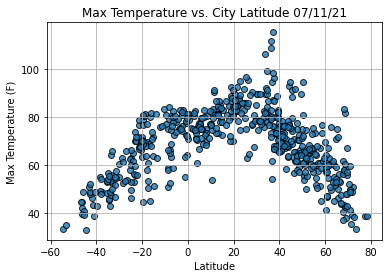

In [52]:
# Build the scatter plot for max temperature vs. latitude.
plt.scatter(lats,
            max_temps,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Max Temperature vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

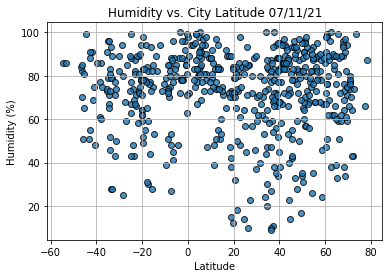

In [53]:
# Build the scatter plot for humidity vs. latitude.
plt.scatter(lats,
            humidity,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Humidity vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

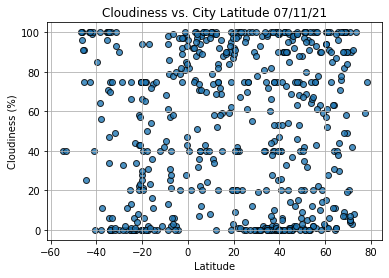

In [54]:
# Build the scatter plot for cloudiness vs. latitude.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Cloudiness vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

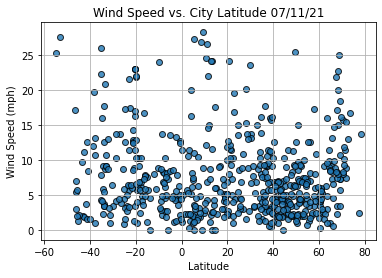

In [55]:
# Build the scatter plot for wind speed vs. latitude.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Wind Speed vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [77]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression_v2(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)) + ". R: " + str(round(r_value, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
index13 = city_data_df.loc[13]
index13

City                       Padang
Country                        ID
Date          2021-07-11 23:16:43
Lat                       -0.9492
Lng                      100.3543
Max Temp                    77.63
Humidity                       87
Cloudiness                     98
Wind Speed                   4.47
Name: 13, dtype: object

In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Plerin,FR,2021-07-11 23:16:38,48.5425,-2.7798,59.32,87,75,1.99
1,Kodiak,US,2021-07-11 23:16:39,57.7900,-152.4072,51.31,82,90,17.27
4,Vostok,RU,2021-07-11 23:16:40,46.4856,135.8833,71.10,78,99,1.54
5,Tasiilaq,GL,2021-07-11 23:16:40,65.6145,-37.6368,46.56,99,100,8.32
6,Pacsa,HU,2021-07-11 23:16:41,46.7198,17.0140,65.59,88,75,11.50


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

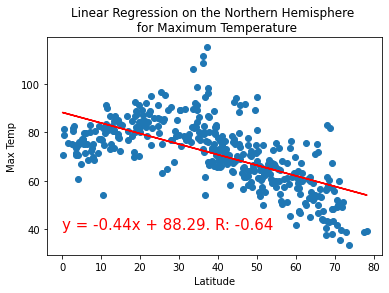

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(0, 40))

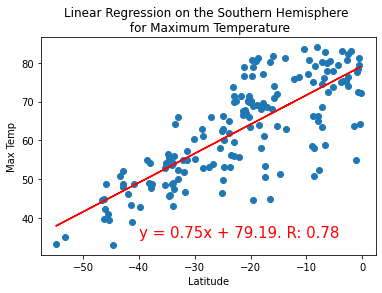

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-40, 35))

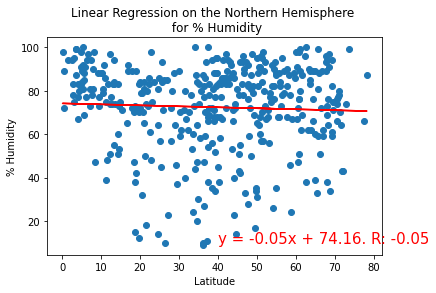

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

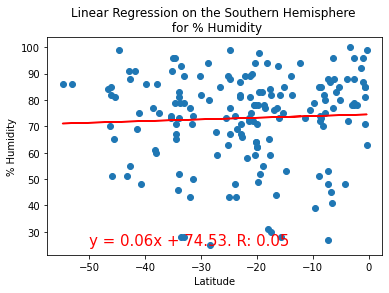

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

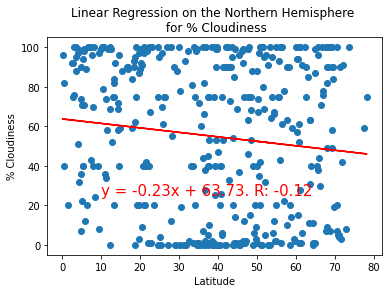

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,25))

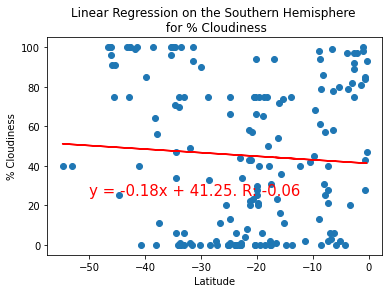

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

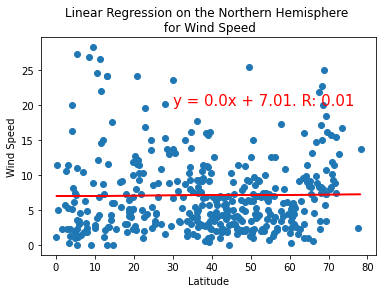

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,20))

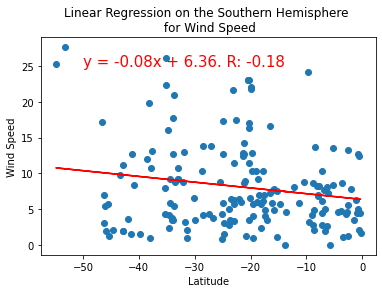

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))